In [ ]:
1)Hits - Number of Search Queries
2) Click-throughs - Number of times visitors clicked on any one of the results in the search listing page
3) Clicks - Cumulative Number of times visitors clicked on any result in the search listing page
(Clicks would always be greater or equal to than clickthroughs)
4) CTR = Clickthrough rate = Click Throughs/Hits
5) Orders - Orders placed against the search query (Query report) or for the particular product (Product Performance report)
6) You can ignore the initial price and final price from your analysis.


In [4]:
##importing all important libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from pandas_profiling import ProfileReport

In [5]:
xls=pd.ExcelFile(r"C:\Users\prash\Downloads\Customer Raw data.xlsx")

In [6]:
df3=pd.read_excel(xls,'sheet3')
df3

C:\Users\prash\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,query,hits,clicks,clickThroughs,ctr,carts,orders
0,pink,3971,330,93,2.34,18,0
1,Chambray,612,1360,447,73.04,145,8
2,gingham in green and white,601,0,0,0.00,0,0
3,white dresses,486,800,310,63.79,73,1
4,grey,480,89,28,5.83,10,0
...,...,...,...,...,...,...,...
495,Pleated knit,14,12,6,42.86,0,0
496,Contrast,14,27,7,50.00,4,0
497,1940s,14,8,4,28.57,4,0
498,crimson,14,19,5,35.71,8,0


In [33]:
##pandas profiling of the data
profile = ProfileReport(df3, title="Pandas Profiling Report")
profile.to_widgets()
profile.to_file("unbxd.html")


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
##listing all columns of the dataset
df3.columns

Index(['query', 'hits', 'clicks', 'clickThroughs', 'ctr', 'carts', 'orders'], dtype='object')

In [8]:
##finding the Null Value 
df3.isnull().sum()

query            0
hits             0
clicks           0
clickThroughs    0
ctr              0
carts            0
orders           0
dtype: int64

# Observation 1 

There are no null values 

In [10]:
df3["orders"].value_counts()

0     348
1      85
2      30
3      17
5       7
4       6
7       2
6       2
8       1
13      1
9       1
Name: orders, dtype: int64

In [36]:
df3.describe()

,hits,clicks,clickThroughs,ctr,carts,orders
count,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000
mean,61.670000,99.620000,30.638000,56.63400,16.27600,0.622000
std,191.192464,143.261157,45.390523,19.59916,62.74962,1.357498
min,14.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,19.000000,27.000000,10.000000,42.86000,2.00000,0.000000
50%,26.000000,49.000000,15.000000,60.87000,6.00000,0.000000
75%,50.000000,106.000000,29.000000,71.43000,16.00000,1.000000
max,3971.000000,1360.000000,447.000000,100.00000,1330.00000,13.000000


In [11]:
df3["carts"].value_counts()

0      80
2      61
6      45
4      37
8      30
       ..
149     1
60      1
47      1
52      1
168     1
Name: carts, Length: 71, dtype: int64

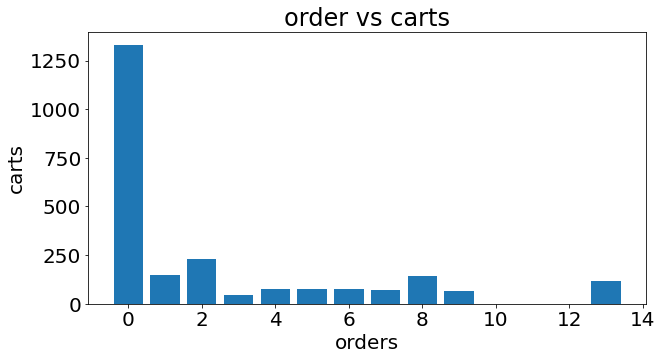

In [25]:
###

fig=plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 20})
plt.bar(df3["orders"],df3["carts"])
plt.xlabel("orders")
plt.ylabel("carts")
plt.title("order vs carts")
plt.show()


In [11]:
###finding correlation cofficient between carts and orders 
orders=df3["orders"]
carts=df3["carts"]
correlation= carts.corr(orders)
correlation

0.15988691079453826

<AxesSubplot:xlabel='orders', ylabel='carts'>

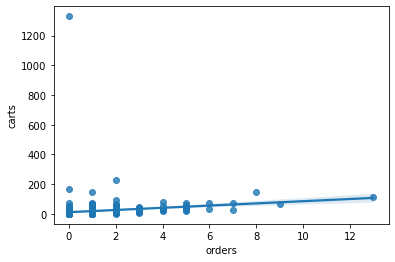

In [13]:
###correlation graph between ordrs and carts 

sns.regplot(x=df3["orders"], y=df3["carts"])

# Observaton 2

correlation between carts and ordrs are very weak,hance there is no impact of carts on the orders .

In [15]:
###finding correlation cofficient between carts and orders 
orders=df3["orders"]
clicks=df3["clicks"]
correlation= clicks.corr(orders)
correlation

0.5649419881256962

<AxesSubplot:xlabel='orders', ylabel='clicks'>

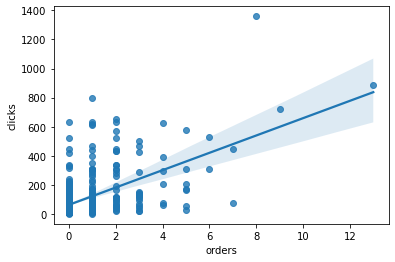

In [16]:
###correlation graph between ordrs and clicks 

sns.regplot(x=df3["orders"], y=df3["clicks"])

# Observation 3
there is moderate correlation b/w clicks and orders 

In [18]:
###finding correlation cofficient between clicks Through and orders 
orders=df3["orders"]
clicks_through=df3["clickThroughs"]
correlation= clicks_through.corr(orders)
correlation

0.5720717450877078

<AxesSubplot:xlabel='orders', ylabel='clickThroughs'>

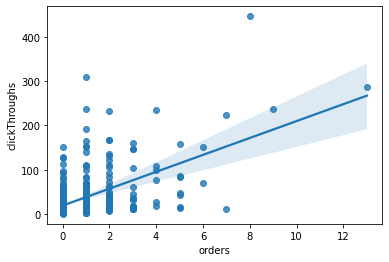

In [21]:
###correlation graph between ordrs and clicks through

sns.regplot(x=df3["orders"], y=df3["clickThroughs"])

# Observation 4
there is moderate correlation b/w clicks through and orders 

In [24]:
###finding correlation cofficient between clicks Through and orders 
orders=df3["orders"]
hits=df3["hits"]
correlation= clicks_through.corr(orders)
correlation

0.5720717450877078

<AxesSubplot:xlabel='orders', ylabel='hits'>

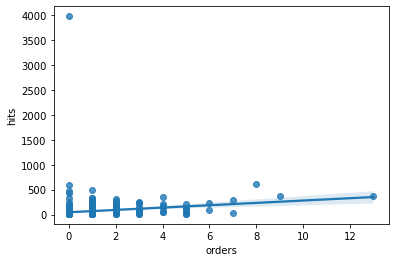

In [23]:
###correlation graph between ordrs and clicks through

sns.regplot(x=df3["orders"], y=df3["hits"])

# Observation 5

There is very low correlation between hits and orders 

In [25]:
###finding correlation cofficient between clicks Through and orders 
orders=df3["orders"]
ctr=df3["ctr"]
correlation= ctr.corr(orders)
correlation

0.14588288571789287

<AxesSubplot:xlabel='orders', ylabel='ctr'>

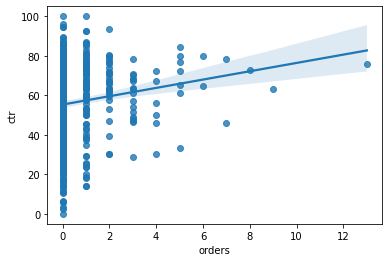

In [26]:
sns.regplot(x=df3["orders"],y=df3["ctr"])

# Observation 6

There is very low correlation between ctr and orders hecne to improve the conversation there parameters will not help much.

In [17]:
df3.describe()

,hits,clicks,clickThroughs,ctr,carts,orders
count,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000
mean,61.670000,99.620000,30.638000,56.63400,16.27600,0.622000
std,191.192464,143.261157,45.390523,19.59916,62.74962,1.357498
min,14.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,19.000000,27.000000,10.000000,42.86000,2.00000,0.000000
50%,26.000000,49.000000,15.000000,60.87000,6.00000,0.000000
75%,50.000000,106.000000,29.000000,71.43000,16.00000,1.000000
max,3971.000000,1360.000000,447.000000,100.00000,1330.00000,13.000000


<AxesSubplot:xlabel='hits', ylabel='Count'>

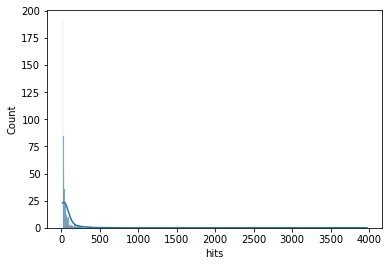

In [15]:
sns.histplot(df3['hits'],kde=True)

<AxesSubplot:xlabel='clicks', ylabel='Count'>

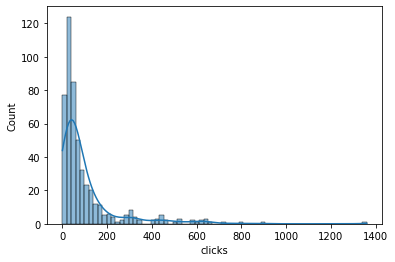

In [13]:
sns.histplot(df3['clicks'],kde=True)

<AxesSubplot:xlabel='clickThroughs', ylabel='Count'>

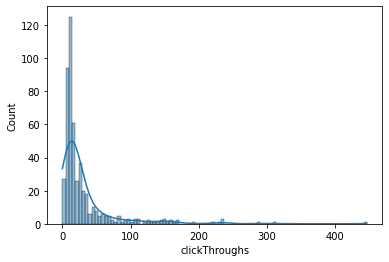

In [16]:
sns.histplot(df3['clickThroughs'],kde=True)

<AxesSubplot:xlabel='ctr', ylabel='Count'>

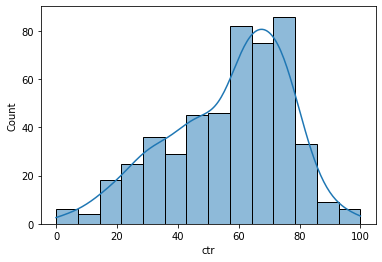

In [17]:
sns.histplot(df3['ctr'],kde=True)

<AxesSubplot:xlabel='carts', ylabel='Count'>

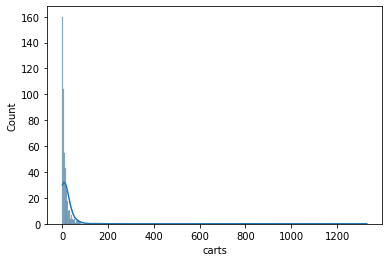

In [18]:
sns.histplot(df3['carts'],kde=True)

<AxesSubplot:xlabel='orders', ylabel='Count'>

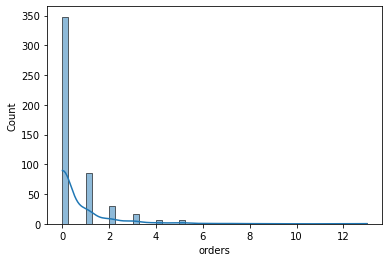

In [19]:
sns.histplot(df3['orders'],kde=True)

In [ ]:
c

# Observation 7 
Non of the data is normolly distributed rather than ctr

C:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hits'>

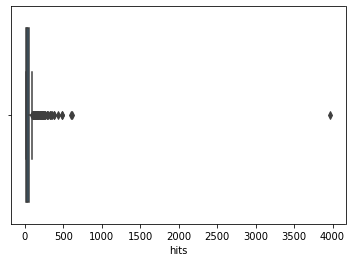

In [21]:
##Finding outlier 
sns.boxplot(df3['hits'])

Observation 
there are more outlier in hits 

C:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clicks'>

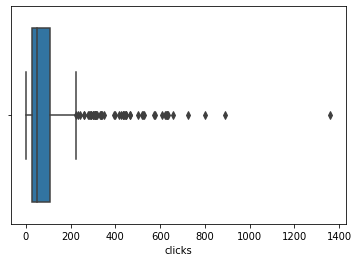

In [22]:
sns.boxplot(df3['clicks'])

Observation 
outlier are available in the clicks

C:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clickThroughs'>

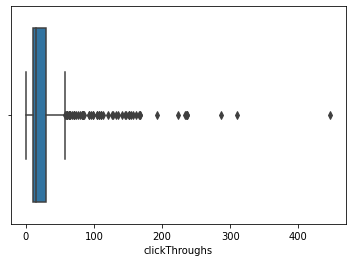

In [23]:
sns.boxplot(df3['clickThroughs'])

observation 
outlier are availabe in the click Throughs

C:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ctr'>

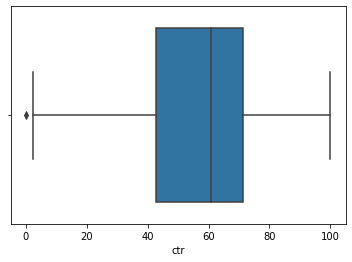

In [24]:
sns.boxplot(df3['ctr'])

# Observtion 8
there are not only one  outlier in the ctr 

C:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carts'>

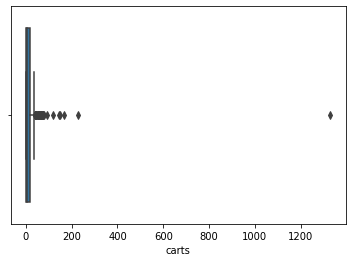

In [25]:
sns.boxplot(df3['carts'])

more ourlier are availabe in the carts

C:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='orders'>

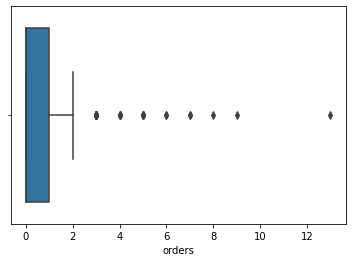

In [26]:
sns.boxplot(df3['orders'])

array([[<AxesSubplot:title={'center':'hits'}>,
        <AxesSubplot:title={'center':'clicks'}>],
       [<AxesSubplot:title={'center':'clickThroughs'}>,
        <AxesSubplot:title={'center':'ctr'}>],
       [<AxesSubplot:title={'center':'carts'}>,
        <AxesSubplot:title={'center':'orders'}>]], dtype=object)

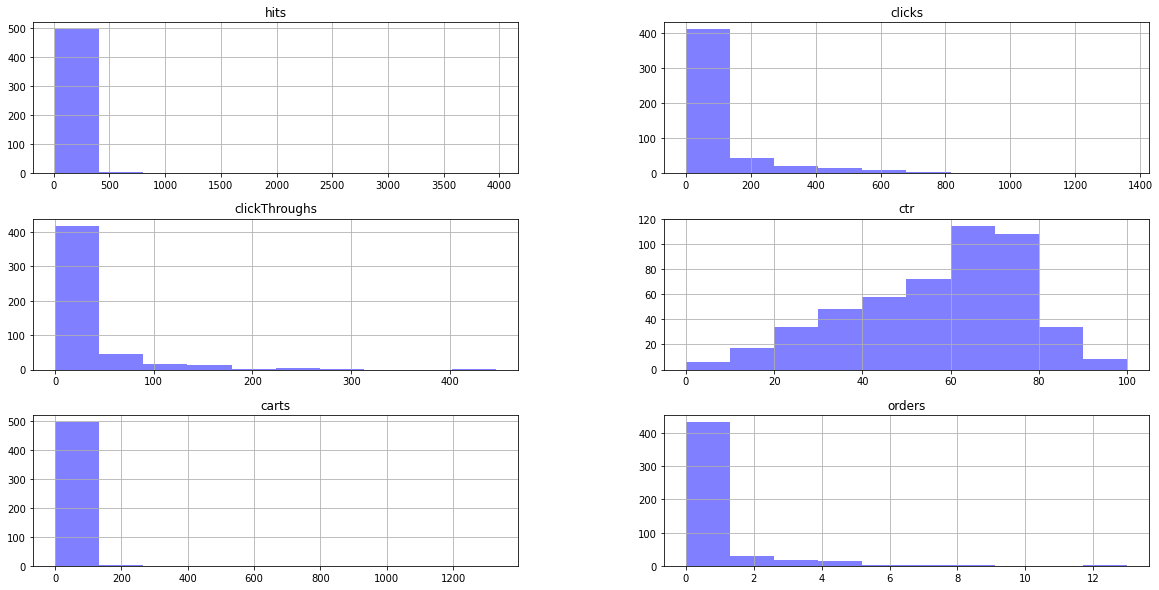

In [28]:
df3.hist(figsize=(20,10),color='b',alpha=.5)

<BarContainer object of 6 artists>

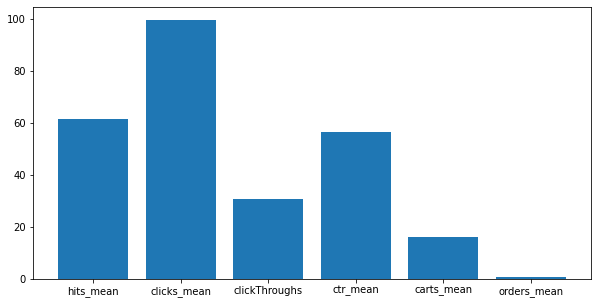

In [46]:
hits_mean=np.mean(df3['hits'])
clicks_mean=np.mean(df3['clicks'])
clickThroughs_mean=np.mean(df3['clickThroughs'])
ctr_mean=np.mean(df3['ctr'])
carts_mean=np.mean(df3['carts'])
orders_mean=np.mean(df3['orders'])


l1=[]
l1.append(hits_mean)
l1.append(clicks_mean)
l1.append(clickThroughs_mean)
l1.append(ctr_mean)
l1.append(carts_mean)
l1.append(orders_mean)
l1
l2=["hits_mean","clicks_mean","clickThroughs","ctr_mean","carts_mean","orders_mean"]
plt.figure(figsize=((10), (5)))
plt.bar(l2,l1,)

# Observation 9
order mean is very low compare to the hits and clicks 
people are coming on website to see the product but buying very less 

<AxesSubplot:xlabel='clicks', ylabel='orders'>

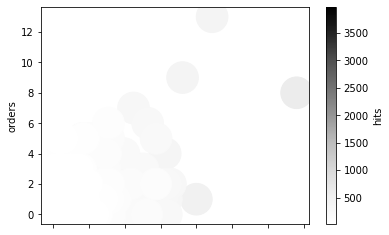

In [33]:
df3.plot.scatter(x='clicks',y='orders',c='hits',s=1000)

<AxesSubplot:xlabel='clicks', ylabel='orders'>

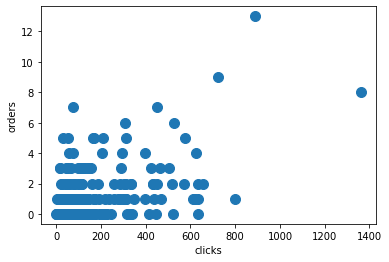

In [54]:
df3.plot.scatter(x='clicks',y='orders',s=100)

# Observation 
clicks has impact on the order of the product , if clicks are very high order is less order 8 , 13 can be considred as outlier .

<AxesSubplot:xlabel='clicks', ylabel='orders'>

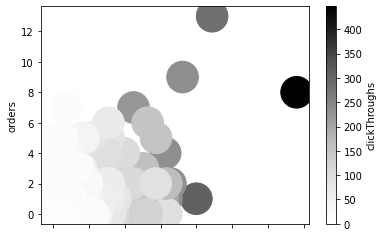

In [36]:
df3.plot.scatter(x='clicks',y='orders',c='clickThroughs',s=1000)

observation 
oder value is high if Number of times visitors clicked on any one of the results in the search listing page is less.

<AxesSubplot:xlabel='carts', ylabel='orders'>

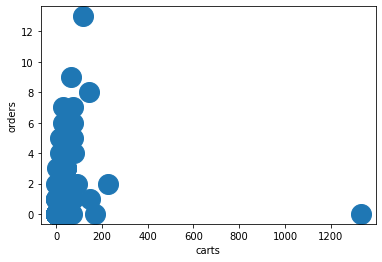

In [37]:
df3.plot.scatter(x='carts',y='orders',s=400)

# Observation 
the ratio of cart to order convertion is more if cart value is less then 300 . 